# Question 3 | ME7223 - End Semester Exam
## Conjugate Gradient Descent Method
### Saarthak Marathe | ME17B162

In [46]:
import numpy as np 
import matplotlib.pyplot as plt
import math
from sympy.solvers import solve
from sympy import *

In [47]:
#roll no is ME17B162
a = 162/17
b = 6
c = 9
d = 5
e = 1

In [84]:
def f(x):
    return (x[0]**2+x[1]-b)**2+(x[0]+x[1]**2-e)**2

#defining the gradient of the objective function
def gradf(x):
    fx1 = 2*(x[0]**2+x[1]-b)*(2*x[0]) + 2*(x[0]+x[1]**2-e)
    fx2 = 2*(x[0]**2+x[1]-b) + 2*(x[0]+x[1]**2-e)*(2*x[1])
    return np.array([fx1,fx2])
    
#norm taking function
def norm(x):
    return math.sqrt(x[0]**2 + x[1]**2)

#normalizing any vector: x_normalized = x/||x||
def normalize(x):
    return (x / math.sqrt(x[0]**2 + x[1]**2))


#calculation of the lambda step for each iteration
'''
Conditions are used below to check the positive definiteness of hessian matrix. This is important to find out 
which lambda_step needs to be chosen as we may get multiple values given that gradf(x) function is a quadratic function.

The steps for this are mentioned below:
Find all lambda values
Calculate Hessian for all f(x) corresponding to these lambda values
Check which hessians are positive definite
if there is only one solution: 
    print that
else:
    find the hessian giving highest value and take lambda corresponding to this value
'''
def lambda_calc(x,l):
    sol = solve(diff(f(x)), l) #find the lambda for which grad_f goes to zero
    sol = np.array([float(re(i)) for i in sol])
    hess = diff(diff(f(x)))  #calculation of hessian values
    hes_vals = np.array([float(hess.evalf(subs={l: i})) for i in sol]) #calculating hessian of all possible points corresponding to the lambda
    
    if len(sol) == 1: #return if only one lambda value is found
        return sol
   
    #for multiple lambda points 
    candidates = [i for i in range(len(sol)) if hes_vals[i] > 0] #Keeping the points only with hessian definite positive
    hes_vals = [hes_vals[i] for i in candidates]
    
    try:
        return sol[candidates[np.argmax(hes_vals)]] #finding lambda with best hessian
    except:
        return 'None'

In [85]:
'''
Algorithm:
input starting point
define the terminating condition
loop (maxiters and tolerance condition):
    if i==1:
        S = -grad(f)
        calculate lambda value
        x_new = x_old+lambda*S
        carry forward the S,x_old, grad values
        error calculation
    else:
        S = -gradf(x_new) + (||gradf(x_new)||/||gradf(x_old)||)*S_old
        calculate lambda value
        x_old = x_new
        x_new = x_old+lambda*S
        carry forward the S,x_old, grad values
        error calculation
'''

def conjugate_gradient_descent(x0):
    x0 = np.asarray(x0)
    
    #initializing count, error and terminating conditions
    i = 0
    maxiter = 10
    tol = 1e-03
    error = norm(gradf(x0))
    
    lmb = symbols("lambda")  #for the calculation of lambda values. defining the variable
    
    points = [x0]   #for storing all the points visited
    
    print('Count - ', i, ' - x values:', x0,' - f(x) value:', f(x0))
    
    #while loop with tolerance and max iterations terminating conditions
    while error > tol and i<maxiter:
        
        i=i+1
        
        if i == 1:
            S = -gradf(x0) #initializing S direction vector
            S = normalize(S) #normalizing S
            
            x_symb = x0 + lmb*S  #calculation of lambda
            lmb_step = lambda_calc(x_symb,lmb)
            x = x0 + lmb_step*S
            
            print('Count - ', i, ' - x values:', x,' - f(x) value:', f(x))
            
            #storing the current values for further use
            prev_x = x0
            prev_S = S
            prev_grad = gradf(prev_x)
            points.append(x)
            error = norm(gradf(x)) #error = ||grad(f(x))||
        
        else:
            grad = gradf(x)
            S = -grad + ((norm(grad)/(norm(prev_grad)+1e-04))**2)*prev_S  #establishing the new S value
            S = normalize(S) #normalizing S
            
            x_symb = prev_x + lmb*S #calculation of lambda
            lmb_step = lambda_calc(x_symb,lmb)
            x = prev_x + lmb_step*S
            
            print('Count - ', i, ' - x values:', x,' - f(x) value:', f(x))
            
            error = norm(grad) #error = ||grad(f(x))||
            prev_x = x
            prev_S = S
            prev_grad = gradf(prev_x)
            points.append(x)

    return x, f(x), i, np.array(points)

In [86]:
def plot(points, f):
    #establishing the boundaries
    x = np.linspace(-3, 3, 1000)
    y = np.linspace(-3, 3, 1000)
    
    #contour plotting
    xx, yy = np.meshgrid(x, y)
    zz = np.array([f(a) for a in np.c_[xx.ravel(), yy.ravel()]])
    zz = zz.reshape(xx.shape)
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, zz)
    plt.colorbar()
    
    #points visited plotting
    plt.plot(points[:, 0], points[:, 1], color='w', linewidth=2)
    plt.scatter(points[:, 0], points[:, 1], c='w', s=40, edgecolor='w')
    plt.text(points[0][0]-0.1, points[0][1]+0.1, 'start', color='w', fontsize=12, fontweight='bold') #start point
    plt.text(points[-1][0]+0.1, points[-1][1]-0.10, 'end', color='w', fontsize=12, fontweight='bold') #end point
    plt.axvline(points[-1][0], ymin=0, ymax=1, color='w', linewidth=1)
    plt.axhline(points[-1][1], xmin=0, xmax=1, color='w', linewidth=1)
    plt.grid()
    plt.title('Trajectory of Conjugate Gradient Descent from (' + str(points[0]) + ')')
    plt.show()

Count -  0  - x values: [2 0]  - f(x) value: 5
Count -  1  - x values: [2.36728779 0.10493937]  - f(x) value: 1.9843973841801845
Count -  2  - x values: [1.99997928e+00 7.25208034e-05]  - f(x) value: 4.9999999906625145
Count -  3  - x values: [-2.78720665 -1.73034363]  - f(x) value: 0.6304929899227951
Count -  4  - x values: [-2.7293331  -1.83278667]  - f(x) value: 0.28416073712913625
Count -  5  - x values: [-2.82716118 -1.92607734]  - f(x) value: 0.018237073896029184
Count -  6  - x values: [-2.82250228 -1.95632074]  - f(x) value: 0.0001259895530976656
Count -  7  - x values: [-2.82243619 -1.95656954]  - f(x) value: 0.00012452121923648495
Count -  8  - x values: [-2.82236508 -1.95675872]  - f(x) value: 0.00012351343790930084
Count -  9  - x values: [-2.82229301 -1.95690646]  - f(x) value: 0.00012278266818628708
Count -  10  - x values: [-2.8222216  -1.95702459]  - f(x) value: 0.00012222579660531551


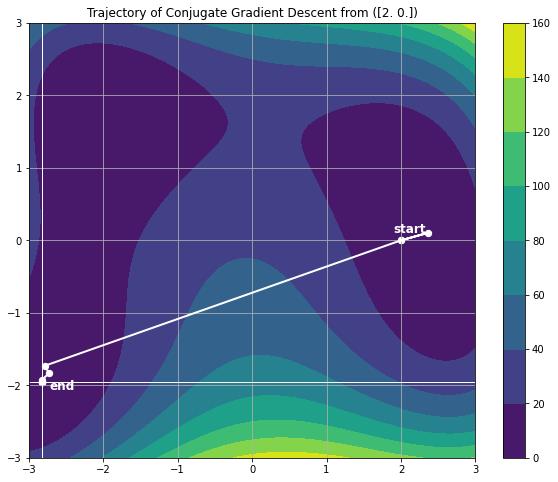

In [87]:
opt, optval, count, points = conjugate_gradient_descent([2,0])
plot(points, f)

Count -  0  - x values: [1 0]  - f(x) value: 25
Count -  1  - x values: [-2.81773956 -1.90886978]  - f(x) value: 0.031208398945188974
Count -  2  - x values: [0.27124257 1.44626108]  - f(x) value: 21.929424558798573
Count -  3  - x values: [-2.07460566  1.2803183 ]  - f(x) value: 2.233147217457927
Count -  4  - x values: [-2.05080403  1.74950718]  - f(x) value: 0.0020971301756255844
Count -  5  - x values: [-2.05235734  1.75421315]  - f(x) value: 0.0017503783877394485
Count -  6  - x values: [-2.05451939  1.75706025]  - f(x) value: 0.0015511583491833406
Count -  7  - x values: [-2.05669849  1.75862336]  - f(x) value: 0.00142938292358206
Count -  8  - x values: [-2.05875411  1.75936254]  - f(x) value: 0.0013444433871064743
Count -  9  - x values: [-2.06068724  1.75952163]  - f(x) value: 0.0012765357754179181
Count -  10  - x values: [-2.06252117  1.75920091]  - f(x) value: 0.0012152330379948393


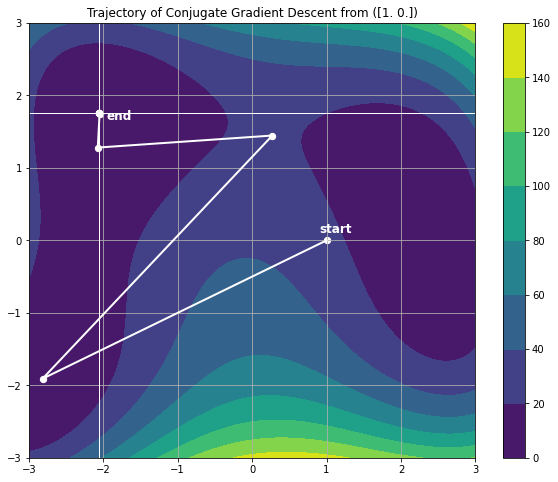

In [88]:
opt, optval, count, points = conjugate_gradient_descent([1,0])
plot(points, f)

Count -  0  - x values: [0 0]  - f(x) value: 37
Count -  1  - x values: [0.25068233 1.50409397]  - f(x) value: 21.94117147996892
Count -  2  - x values: [ 2.45084576 -0.38402665]  - f(x) value: 2.6970509042260375
Count -  3  - x values: [ 2.50775741 -0.26739955]  - f(x) value: 2.494521919547549
Count -  4  - x values: [ 2.38723104 -0.16289601]  - f(x) value: 2.2140529658344628
Count -  5  - x values: [ 2.4289205 -0.0397682]  - f(x) value: 2.065967760965115
Count -  6  - x values: [2.36807409 0.03531112]  - f(x) value: 2.002427497143046
Count -  7  - x values: [2.36874021 0.10343854]  - f(x) value: 1.984439227208316
Count -  8  - x values: [2.36872282 0.10384348]  - f(x) value: 1.984438666494198
Count -  9  - x values: [2.3686718  0.10435795]  - f(x) value: 1.9844378601278523
Count -  10  - x values: [2.36857251 0.10498207]  - f(x) value: 1.9844367663529736


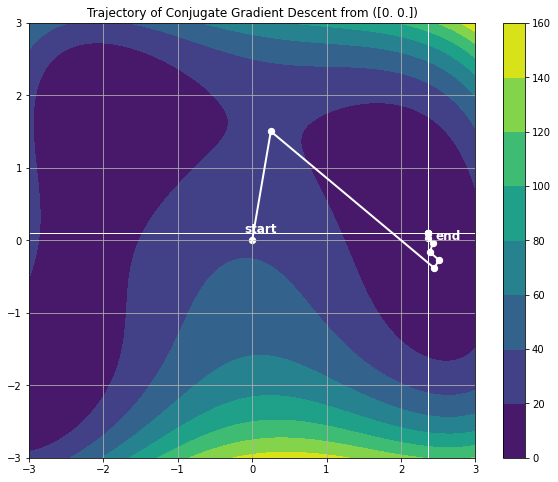

In [89]:
opt, optval, count, points = conjugate_gradient_descent([0,0])
plot(points, f)

Count -  0  - x values: [-1 -1]  - f(x) value: 37
Count -  1  - x values: [-2.38021392 -0.49810403]  - f(x) value: 10.503455365885474
Count -  2  - x values: [-0.05801303  1.52052087]  - f(x) value: 21.60803561060174
Count -  3  - x values: [-2.06473791  1.72074663]  - f(x) value: 0.011027552792346022
Count -  4  - x values: [-2.07487344  1.73006065]  - f(x) value: 0.007921543617075156
Count -  5  - x values: [-2.07810475  1.74354878]  - f(x) value: 0.005307294448583452
Count -  6  - x values: [-2.07445129  1.7548759 ]  - f(x) value: 0.003416440977170116
Count -  7  - x values: [-2.06935087  1.7601014 ]  - f(x) value: 0.002608817244129698
Count -  8  - x values: [-2.06515493  1.76191848]  - f(x) value: 0.0022541309444520452
Count -  9  - x values: [-2.06177826  1.76213296]  - f(x) value: 0.002048491280804378
Count -  10  - x values: [-2.05896247  1.76139139]  - f(x) value: 0.0018959992732523472


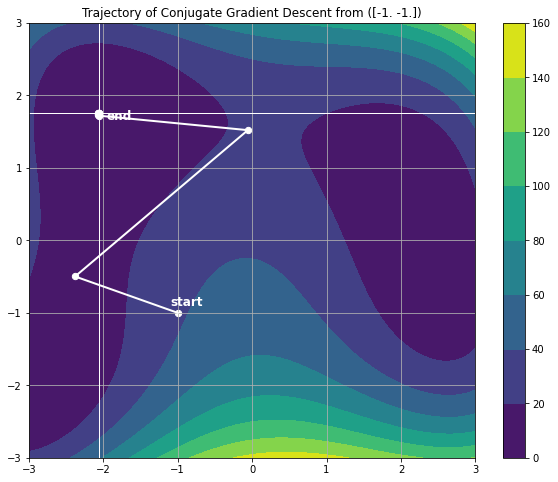

In [90]:
opt, optval, count, points = conjugate_gradient_descent([-1,-1])
plot(points, f)

Count -  0  - x values: [ 2 -1]  - f(x) value: 13
Count -  1  - x values: [ 2.5608258  -0.60742194]  - f(x) value: 3.7265381699271583
Count -  2  - x values: [ 1.9911909  -0.98714917]  - f(x) value: 12.998142565585137
Count -  3  - x values: [ 2.55311738 -0.56715241]  - f(x) value: 3.51717313989826
Count -  4  - x values: [ 2.32133011 -0.09906805]  - f(x) value: 2.276748448380214
Count -  5  - x values: [ 2.40657367 -0.02961142]  - f(x) value: 2.037567874364206
Count -  6  - x values: [2.41458011 0.01097813]  - f(x) value: 2.026603172678952
Count -  7  - x values: [2.36877708 0.06237383]  - f(x) value: 1.9908324404813622
Count -  8  - x values: [2.35802753 0.09826183]  - f(x) value: 1.987140797438733
Count -  9  - x values: [2.36134967 0.11673386]  - f(x) value: 1.9849898021714631
Count -  10  - x values: [2.36178654 0.11800132]  - f(x) value: 1.9849738643055244


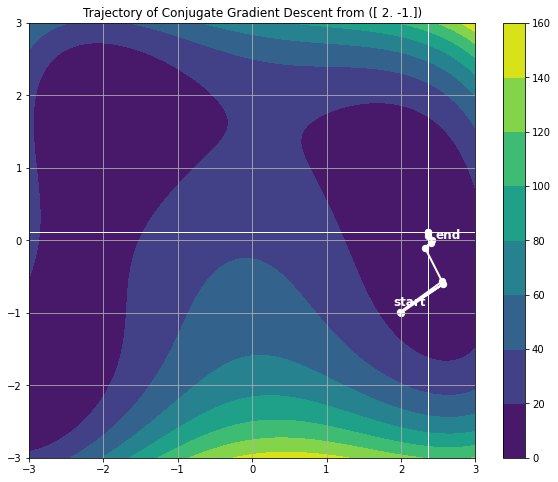

In [91]:
opt, optval, count, points = conjugate_gradient_descent([2,-1])
plot(points, f)